# Temperature Forecast Project using ML

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Lets load the dataset with given URL
df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv",sep = ',')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


## Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

__There are two target variables here:__ 

__1) Next_Tmax: Next day maximum temperature__

__2) Next_Tmin: Next day  minimum temperature__



In [3]:
#shape of the data
df.shape

(7752, 25)

we can see our dataset consists of 25 columns and 7752 samples.

In [4]:
#check for the null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In this data set we have lots of columns with null values, we will replace them with suitable values

In [5]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


* Great we are having all columns with float data type except  a column "Date". 

## Data processing

In [6]:
#lets check the unique values in column 'station'
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

* By observing the whole data set we came to know that there are 25 stations and the data is collected from each of the stations every day.
* station and Date columns having null values at the very last, and null values in station is present after 25, which means this data is collected from next date.

In [7]:
# Lets replace the null values in ststion column, considering it as from next day
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [8]:
#lets replace null values in 'Date' columns with next date of 30-08-2017
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [9]:
#lets have a look on data after updating
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,31-08-2017,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


* By some observations I realize that this dataset is orderly arranged by 'Date' & 'station' columns and it will create problem while cross validation. So I will shuffle the dataset for better results.

In [10]:
#lets shuffle the dataset
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True)
df

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,4944,20.0,11-07-2016,33.2,24.4,82.772179,98.766701,26.123852,21.898978,5.939675,...,0.000000,0.041321,0.407898,37.6181,127.004,146.5540,4.7296,5832.299316,31.1,22.4
1,423,24.0,16-07-2013,29.2,26.7,61.024406,96.001274,28.647992,22.869397,10.055281,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5693.029785,26.4,23.9
2,3369,20.0,10-07-2015,32.6,23.1,49.333893,88.554993,33.317147,24.631050,7.013684,...,0.000000,0.040402,0.000000,37.6181,127.004,146.5540,4.7296,5854.641602,35.3,25.2
3,5013,14.0,14-07-2016,31.6,24.1,46.915379,63.087425,28.758669,24.926844,7.118169,...,0.000000,0.000000,0.056029,37.4967,126.927,30.9680,0.6180,5714.919434,29.8,22.2
4,6417,18.0,08-07-2017,29.2,24.4,66.647141,91.295555,30.251993,24.915042,5.515084,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.2313,5804.297363,31.6,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,4383,9.0,20-08-2015,28.2,24.6,62.787682,94.869614,26.882500,21.587750,5.408590,...,0.448365,0.000000,0.000000,37.4967,126.826,50.9312,0.4125,4846.185547,29.3,22.7
7748,1228,4.0,18-08-2013,32.6,27.6,55.653267,97.574753,31.312637,24.865950,6.577841,...,0.000325,0.217794,0.000000,37.6450,127.022,45.7160,2.5348,4893.187988,33.9,26.2
7749,6897,23.0,27-07-2017,30.1,26.5,74.596848,90.657898,27.415433,24.756656,5.987920,...,0.672873,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,5498.562500,27.7,23.9
7750,476,2.0,19-07-2013,29.8,22.7,63.931870,83.752220,30.563332,25.571009,9.704233,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5666.851563,30.8,23.1


In [11]:
#lets drop the index column
df.drop(columns = 'index', inplace = True)

In [12]:
#As we know latitude and longitude just indicates geographical conditions, so we will drop these two columns
df.drop(columns = ['lat','lon'], inplace = True)

In [13]:
#lets replace all the null values with median of that column
for col in df.columns:
    if col not in ['station','Date']:
        df[col] = df[col].replace(np.nan, df[col].median())

In [14]:
#now check for null values again
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [15]:
#lets convert data type of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['Date'].value_counts()

2016-06-30    25
2016-07-20    25
2014-08-22    25
2015-07-26    25
2015-05-08    25
              ..
2017-08-25    25
2017-06-07    25
2014-12-07    25
2015-01-08    25
2017-08-31     2
Name: Date, Length: 311, dtype: int64

## EDA

### As we are going to predict two variables that are Next_Tmax and Next_Tmin, we will plot graphs for both of our target variables symultaneously

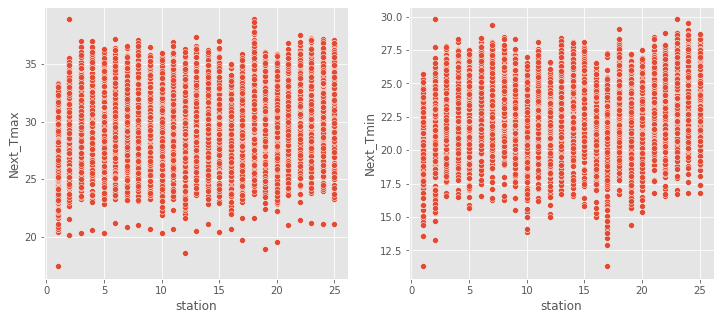

In [17]:
#scatterplot for station vs Next_Tmax and Next_Tmin 
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'station', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'station', y = 'Next_Tmin', data = df)
plt.show()

* In above figure there are two plots; one is Next_Tmax vs ststion and other is Next_Tmin vs station.
* ststion column contains numbers of weather report stations, which are between 1 to 25.
* By above plots we can say there no strong relation between both of our target variables and ststion.

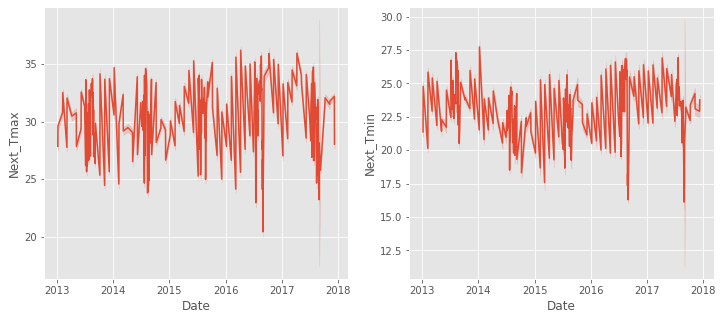

In [18]:
#lets plot lineplot for Date vs Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'Date', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.lineplot(x = 'Date', y = 'Next_Tmin', data = df)
plt.show()

* Above plot represents Date vs Next_Tmax and Next_Tmin, it seems like there is a small drop in temperature in both the cases between 2016 to 2017 and 2017 to 2018 is observed.

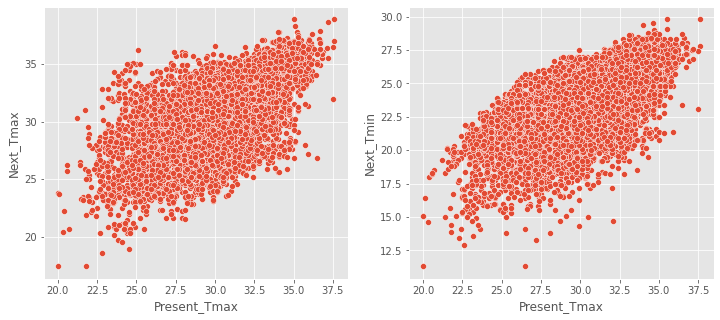

In [19]:
# scatterplots for Present_Tmax vs Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Present_Tmax', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Present_Tmax', y = 'Next_Tmin', data = df)
plt.show()

* Present_Tmax column contains data of maximum temperature from particular date.
* we can see there is a direct relation between Present_Tmax and both of our target variables, that is as Present_Tmax increases our Next_Tmax and Next_Tmin also increases.
* It seems like there is a strong relation between Present_Tmax with Next_Tmin compared to with Next_Tmax.

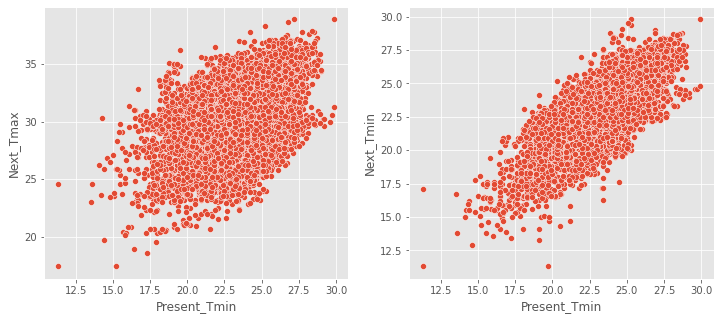

In [20]:
#lets plot scatterplot for Present_Tmin vs Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Present_Tmin', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Present_Tmin', y = 'Next_Tmin', data = df)
plt.show()

* Present_Tmax column contains data of minimum temperature from particular date.
* By seeing these plots we can say Present_Tmin is in good relation with Next_Tmax and Next_Tmin.
* It seems like Present_Tmin is strongly related with Next_Tmin than with Next_Tmax.

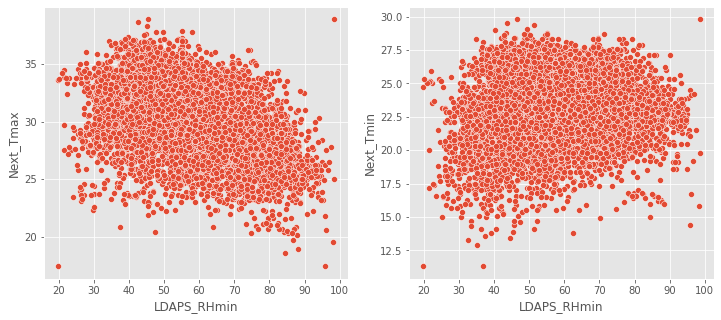

In [21]:
# lets see relation between LDAPS_RHmin with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_RHmin', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_RHmin', y = 'Next_Tmin', data = df)
plt.show()

* Column LDAPS_RHmin contains data of forecast of next-day minimum relative humidity in percentage(%).
* It seems little poor relation between LDAPS_RHmin and Next_Tmax & Next_Tmin. In case of Next_Tmax as LDAPS_RHmin increses Next_Tmax goes down.

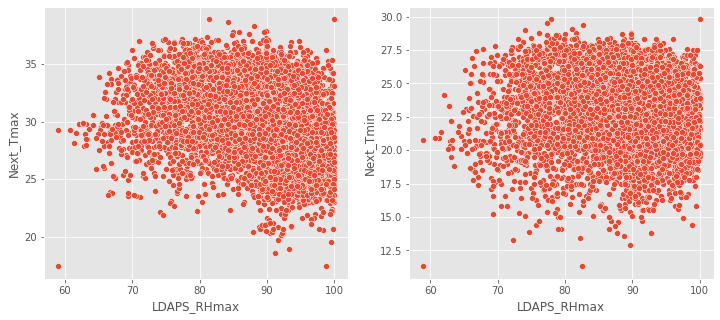

In [22]:
#check relation between LDAPS_RHmax with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_RHmax', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_RHmax', y = 'Next_Tmin', data = df)
plt.show()

* Column LDAPS_RHmax contains data of forecast of next-day maximum relative humidity in percentage(%).
* here we can see in case f Next_Tmax, when LDAPS_RHmax is between 60-70% the Next_Tmax is above 23 degree.
* Here relation seems poor with both of the target variables.

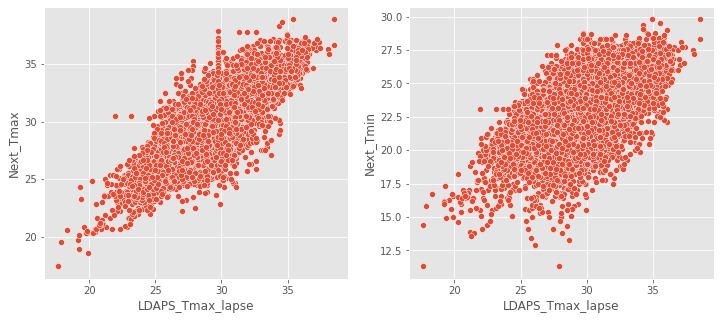

In [23]:
#lets plot scatterplots for LDAPS_Tmax_lapse with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_Tmax_lapse', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_Tmax_lapse', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_Tmax_lapse is forecast of next-day maximum air temperature applied lapse rate.
* We can see LDAPS_Tmax_lapse is directly related to both target variables. As in contains data related to maximum temperature it is strongly related with Next_Tmax than Next_Tmin.

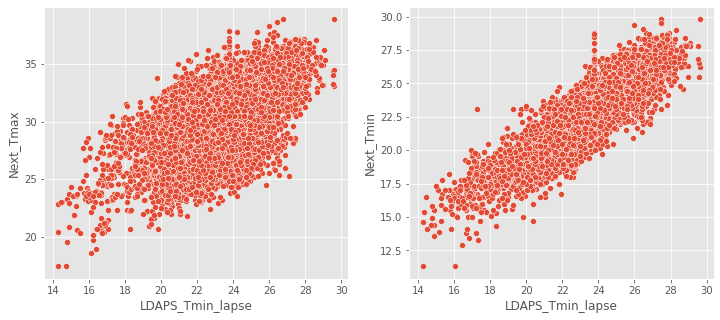

In [24]:
#lets plot scatterplot for LDAPS_Tmin_lapse with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_Tmin_lapse', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_Tmin_lapse', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_Tmin_lapse is forecast of next-day minimum air temperature applied lapse rate.
* We can see LDAPS_Tmin_lapse is directly related to both target variables. As in contains data related to minimum temperature it is strongly related with Next_Tmin than Next_Tmax.

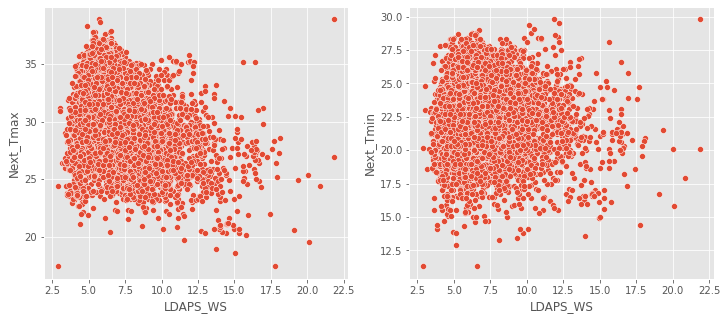

In [25]:
#check relation of LDAPS_WS with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_WS', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_WS', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_WS is having data related to forecast of next-day average wind speed (m/s).
* By observing both of the plots we can say the wind speed is mostly distributed in range of 2.5 to 10 m/s.
* We can say there is poor relation of wind speed with our target variables. but at lower wind speeds higher temperatures are observed in both plots.

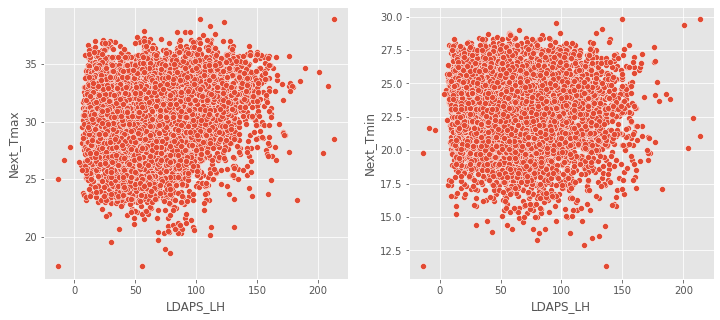

In [26]:
#lets see relation of LDAPS_LH with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_LH', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_LH', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_LH represents LDAPS model forecast of next-day average latent heat flux (W/m2).
* No any relation is observed in both the cases. We can say the LDAPS_LH is mostly distributed in the range of 10 to 150 W/m2.

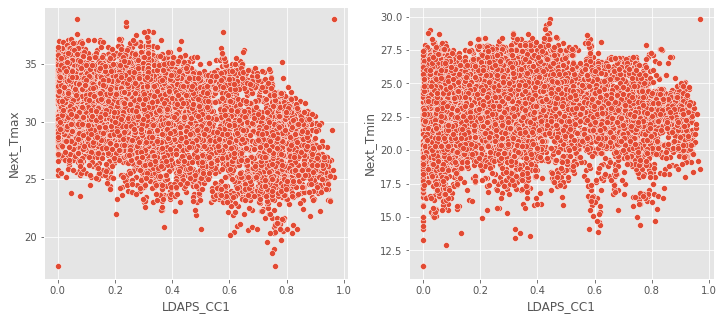

In [27]:
#check relation of LDAPS_CC1 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC1', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC1', y = 'Next_Tmin', data = df)
plt.show()

LDAPS_CC1 represents LDAPS model forecast of next-day 1st 6-hour split average cloud cover in percentage.
By looking at above plots we can conclude that Next_Tmax goes on decreasing as LDAPS_CC1 percentage increases. But there is no any significant relation between LDAPS_CC1 and Next_Tmin is observed.

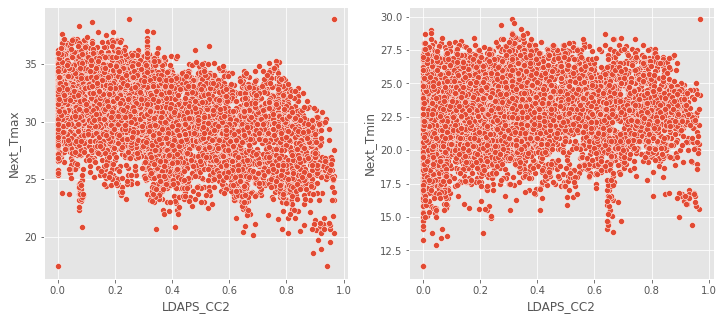

In [28]:
#check relation of LDAPS_CC2 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC2', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC2', y = 'Next_Tmin', data = df)
plt.show()

LDAPS_CC1 represents LDAPS model forecast of next-day 2nd 6-hour split average cloud cover in percentage. 

By looking at above plots we can conclude that Next_Tmax goes on decreasing as LDAPS_CC2 percentage increases. But there is no any significant relation between LDAPS_CC2 and Next_Tmin is observed.

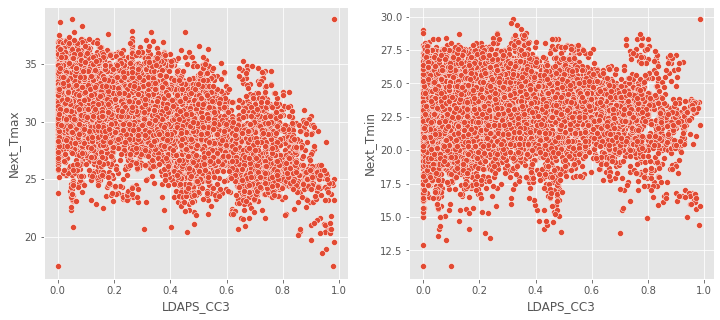

In [29]:
#check relation of LDAPS_CC3 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC3', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC3', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_CC3 represents LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) in percentage.
* we can say there is a decrease in next day maximum temperature as LDAPS_CC3 increases, and the Next_Tmax is less than 20 degree in the range 0.8 to 1.0 of LDAPS_CC3.
* No any significant relation is observed beween Next_Tmin and LDAPS_CC3.

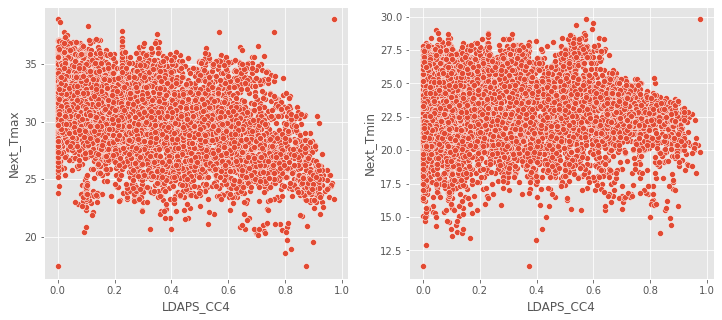

In [30]:
#lets see the relation of LDAPS_CC4 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC4', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC4', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_CC4 represents LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) in percentage.
* here relation is very poor in both the cases.

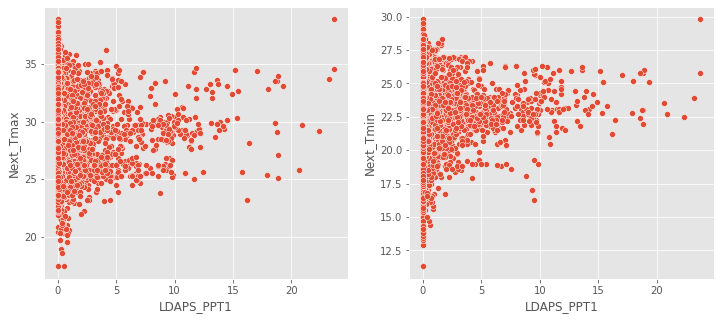

In [31]:
#lets have a look on relation of LDAPS_PPT1 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT1', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT1', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_PPT1 represents LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h)in percentage.
* here we can see LDAPS_PPT1 is mostly in between 0-5%, as it goes above 5% the Next_Tmax is above 23 degree.
* In case of of Next_Tmin as LDAPS_PPT1 goes above 5% the Next_Tmin is above 17.5 degree.

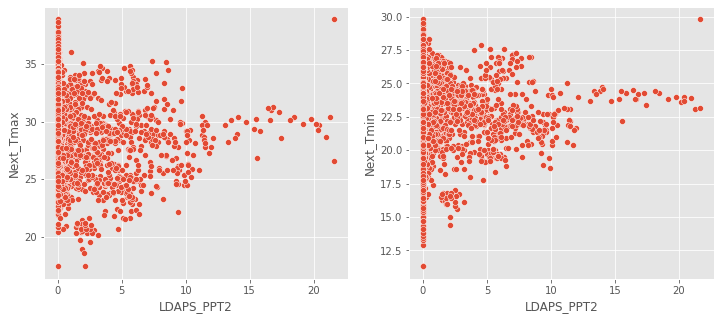

In [32]:
#lets have a look on relation of LDAPS_PPT2 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT2', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT2', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_PPT2 represents LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h)in percentage.
* In this duration the Next_Tmax is mostly above 20 degree.
* In case of Next_Tmin as precipitation is above 10% the Next_Tmin will be in between 20 to 25 degree.

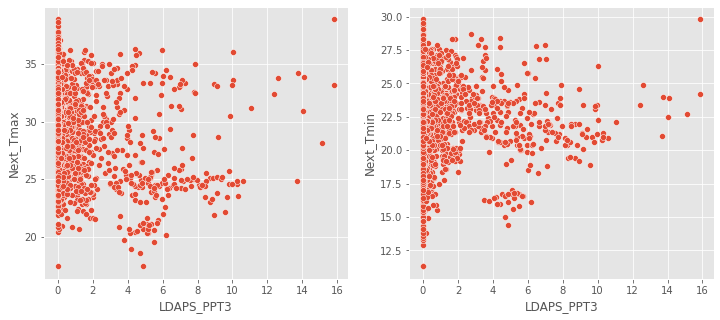

In [33]:
#check relation of LDAPS_PPT3 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT3', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT3', y = 'Next_Tmin', data = df)
plt.show()

LDAPS_PPT3 represents LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) in percentage.
Both of the plots are not showing any strong/good relation with the target variables

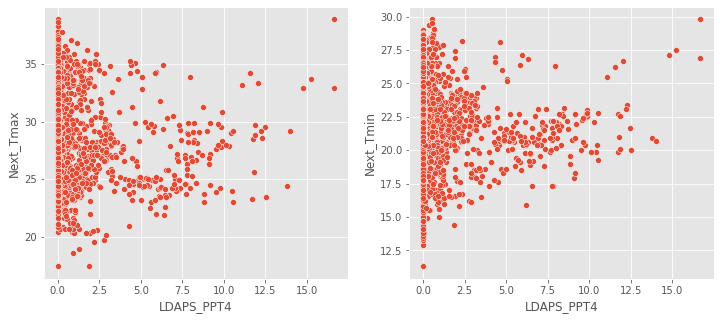

In [34]:
#check relation of LDAPS_PPT4 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT4', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT4', y = 'Next_Tmin', data = df)
plt.show()

* LDAPS_PPT4 represents LDAPS model forecast of next-day 4rd 6-hour split average precipitation (18-23 h) in percentage.
* above 2.5% of LDAPS_PPT4 we observe some linear relation in both the cases that is with Next_Tmax as well as with Next_Tmin.

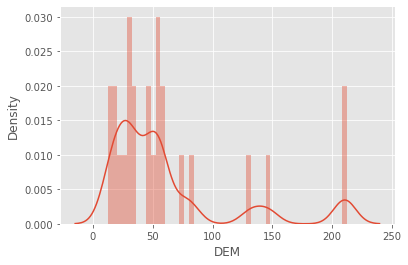

In [35]:
#lets have a look on destribution of DEM
sns.distplot( df['DEM'])
plt.show()

* DEM represents the Elevation in meters, we can see most of the stations have elevation of 10 to 80 meters.

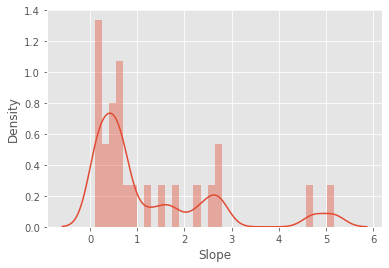

In [36]:
#check the distribution of slope
sns.distplot(df['Slope'])
plt.show()

* This plot will tell us the slope is mostly destributed between 0.1 to 3.0

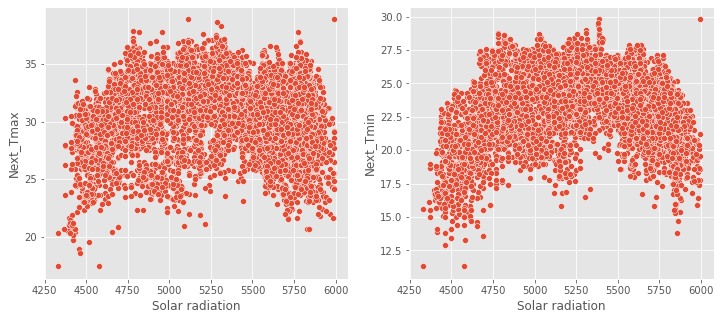

In [37]:
# check relation of Solar radiation with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Solar radiation', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Solar radiation', y = 'Next_Tmin', data = df)
plt.show()

Solar radiations are daily incoming solar radiation (wh/m2). by looking at both the plots we can say that when the solar radiations are in range 4750 to 5500, temperature is higher.

## Heatmap for checking correlation

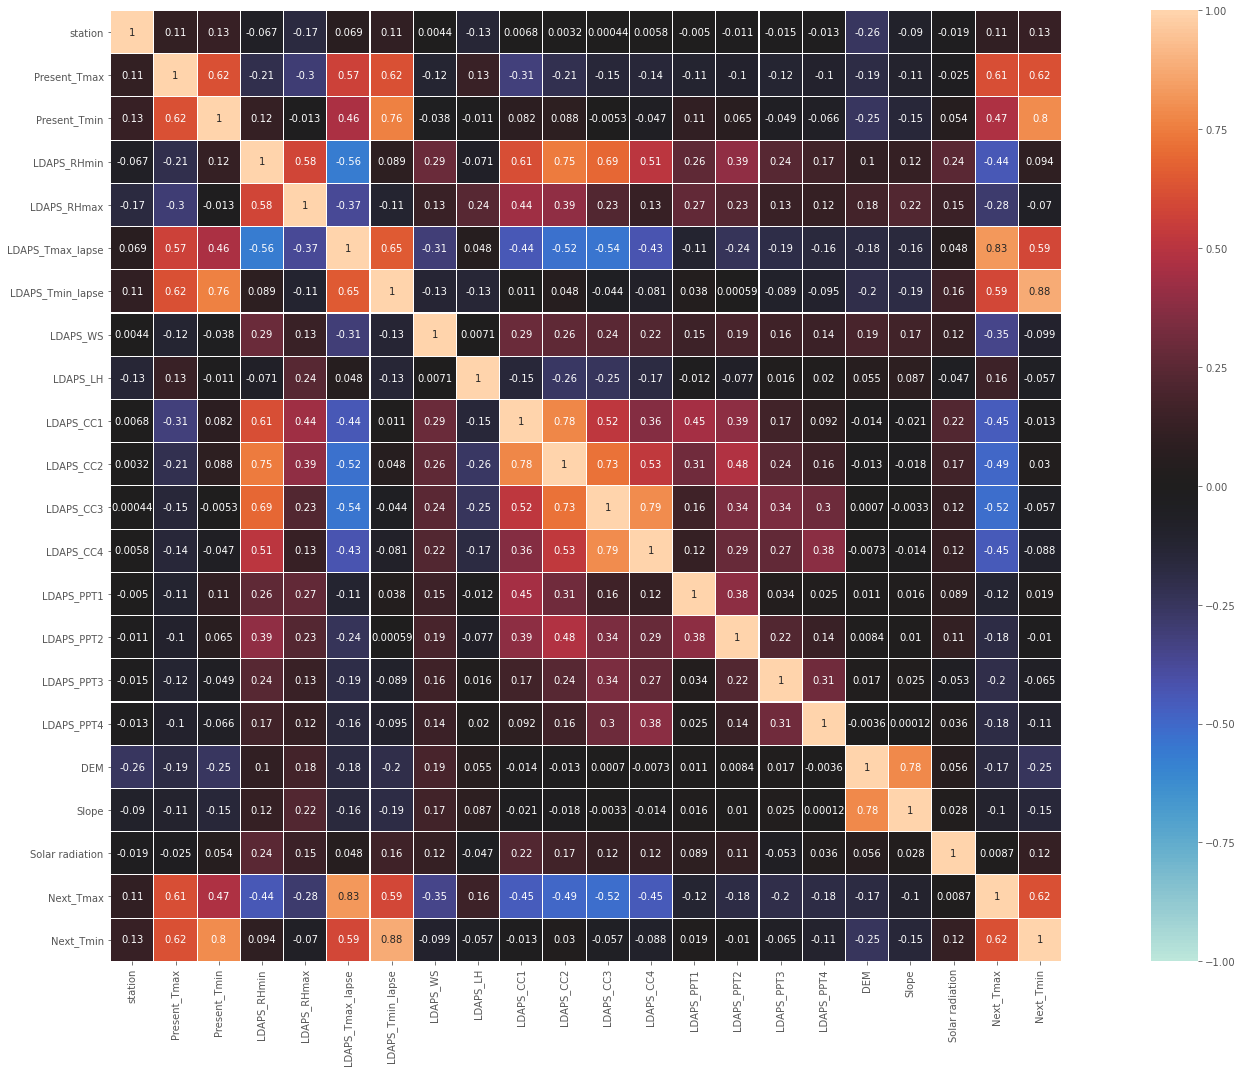

In [38]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

* Looking at the above heatmap we can say much of our features are in good relation with Next_Tmax compared to Next_Tmin.
* the column Solar radiation has very less coefficient of correlation with both of our target variables.
* All columns representing cloud cover percentage are in good correlation with each other, and are negatively related to Next_Tmax.
* Very few features are in good correlation with our second target variable(Next_Tmin), those are Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse and DEM.
* Both the target variable have good relation between them 

In [39]:
#describe the data, to check outliers
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.997033,29.769401,23.226638,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,...,0.298499,0.586267,0.480310,0.275508,0.266801,61.867972,1.257048,5341.502803,30.275671,22.932804
std,7.213007,2.956583,2.403093,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,...,0.253211,1.937198,1.754900,1.156495,1.200654,54.279780,1.370444,429.158867,3.122585,2.483296
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.082741,0.000000,0.000000,0.000000,0.000000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.227664,0.000000,0.000000,0.000000,0.000000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.497230,0.049122,0.016748,0.007231,0.000000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,0.974710,23.701544,21.621661,15.841235,16.655469,212.335000,5.178230,5992.895996,38.900000,29.800000


## Plotting boxplots for checking outliers 

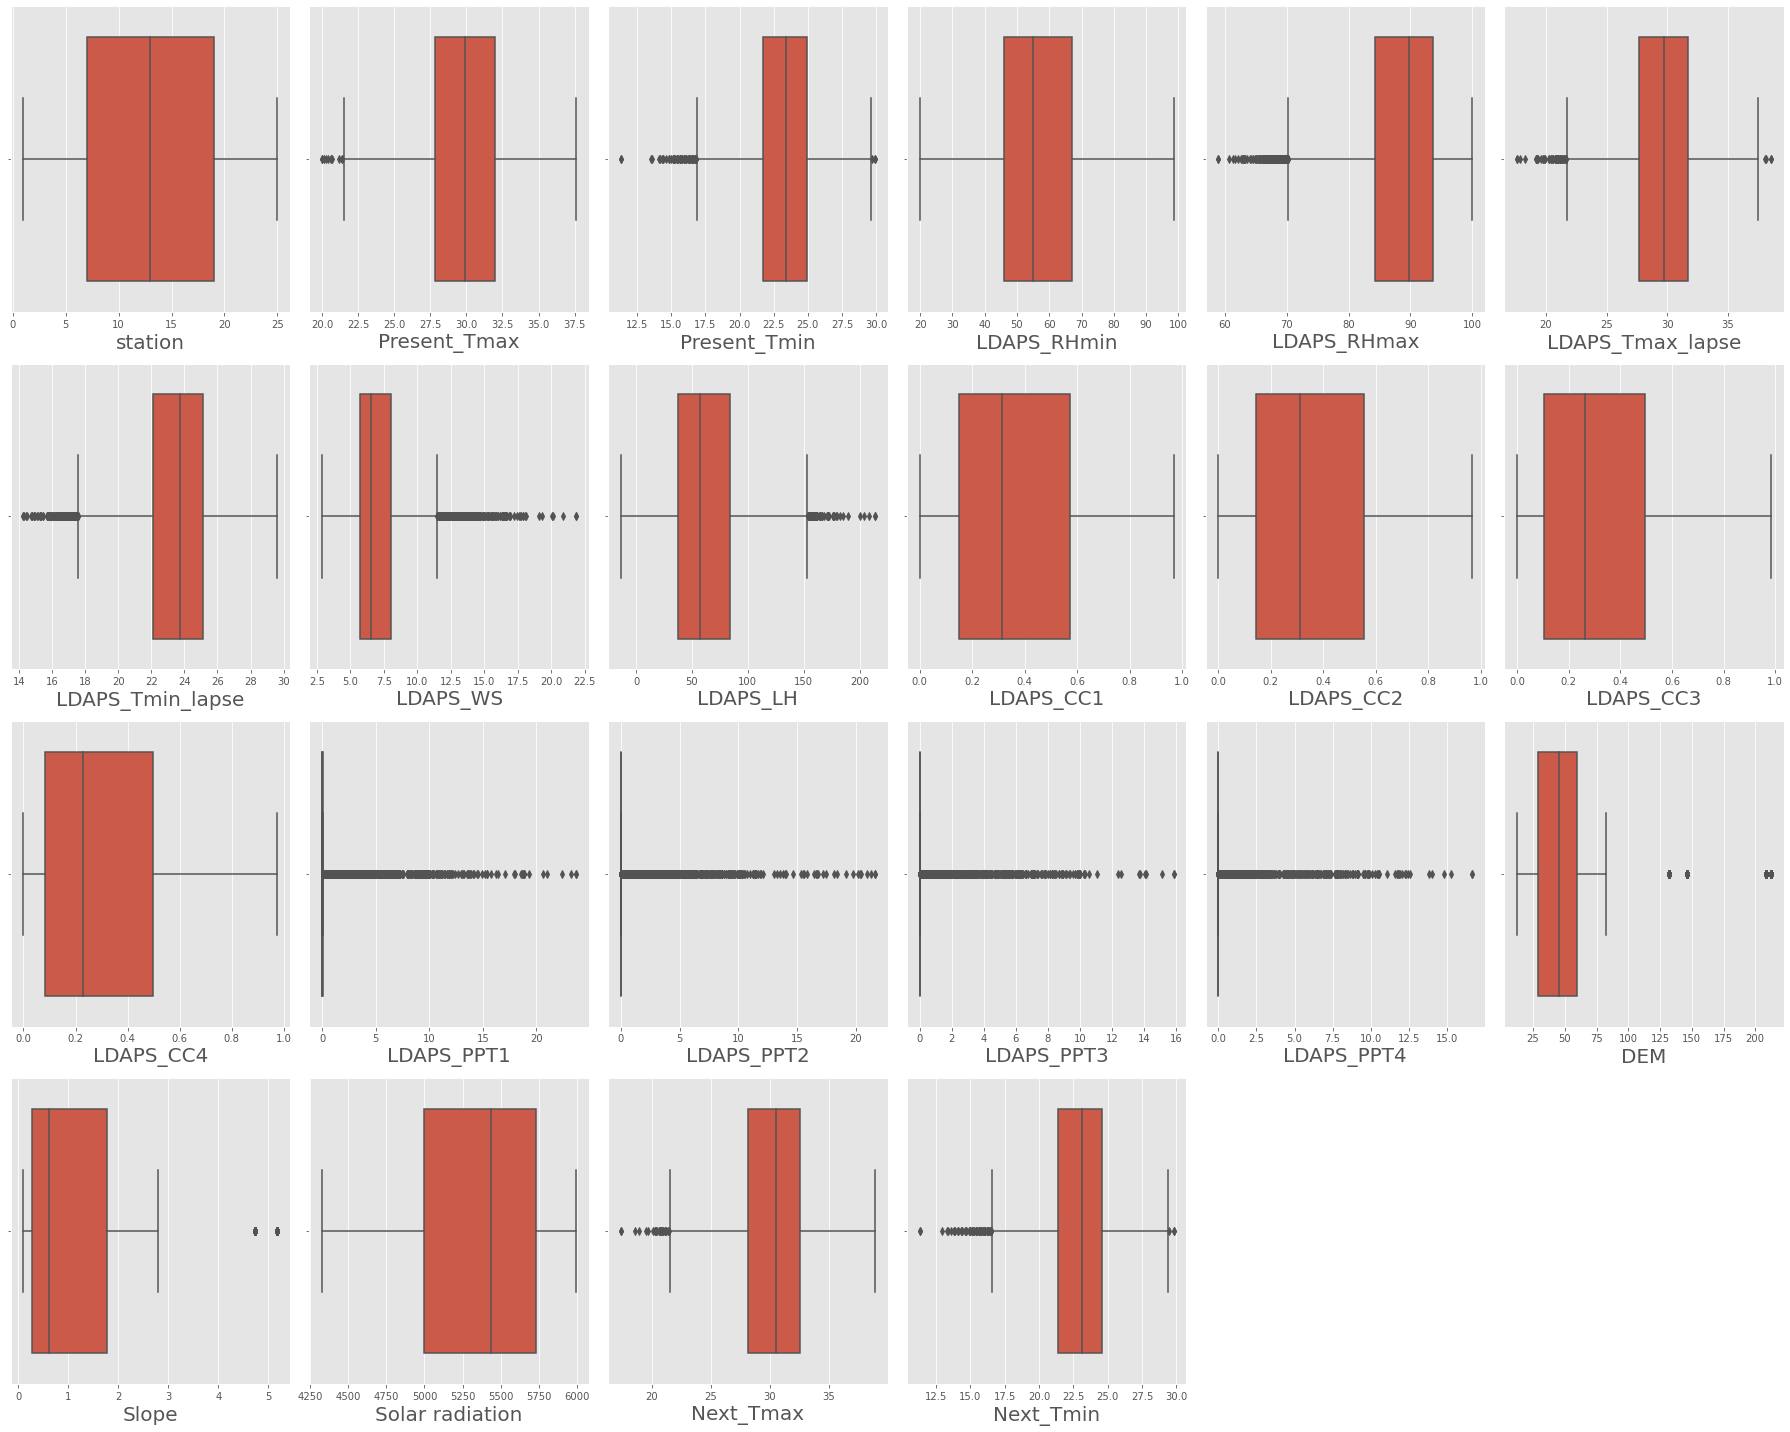

In [40]:
#Lets have a look on distribution of continuous parameters
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df:
    if column != 'Date':
        if plotnumber <=24:
            ax = plt.subplot(4,6,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize = 20)
        plotnumber+=1
plt.tight_layout()

* Here we observe many columns with outliers, we will remove these outliers using zscore method. 
* Much outliers are observed in columns representing precipitation but we will not remove outliers from these column,because it may be its property which will give good results with these values.

In [41]:
#lets check for skewness
df.skew()

station             0.000182
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [42]:
#remove outliers by applying zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','DEM','Slope']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [43]:
df

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,20.0,2016-11-07,33.2,24.4,82.772179,98.766701,26.123852,21.898978,5.939675,...,0.542941,0.887027,0.000000,0.041321,0.407898,146.5540,4.7296,5832.299316,31.1,22.4
1,1,24.0,2013-07-16,29.2,26.7,61.024406,96.001274,28.647992,22.869397,10.055281,...,0.332773,6.104770,0.000000,0.000000,0.000000,17.2956,0.2223,5693.029785,26.4,23.9
2,2,20.0,2015-10-07,32.6,23.1,49.333893,88.554993,33.317147,24.631050,7.013684,...,0.326501,0.000000,0.000000,0.040402,0.000000,146.5540,4.7296,5854.641602,35.3,25.2
3,4,18.0,2017-08-07,29.2,24.4,66.647141,91.295555,30.251993,24.915042,5.515084,...,0.629977,0.000000,0.000000,0.000000,0.000000,56.4448,1.2313,5804.297363,31.6,23.3
4,5,3.0,2017-06-07,32.5,24.0,73.612526,90.554016,28.494540,24.381249,6.318541,...,0.591366,0.000000,0.000000,0.178195,0.000000,33.3068,0.2661,5822.708984,28.3,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,7747,9.0,2015-08-20,28.2,24.6,62.787682,94.869614,26.882500,21.587750,5.408590,...,0.074119,4.893331,0.448365,0.000000,0.000000,50.9312,0.4125,4846.185547,29.3,22.7
7479,7748,4.0,2013-08-18,32.6,27.6,55.653267,97.574753,31.312637,24.865950,6.577841,...,0.012044,7.036035,0.000325,0.217794,0.000000,45.7160,2.5348,4893.187988,33.9,26.2
7480,7749,23.0,2017-07-27,30.1,26.5,74.596848,90.657898,27.415433,24.756656,5.987920,...,0.718600,0.029967,0.672873,0.000000,0.000000,15.5876,0.1554,5498.562500,27.7,23.9
7481,7750,2.0,2013-07-19,29.8,22.7,63.931870,83.752220,30.563332,25.571009,9.704233,...,0.351719,0.000000,0.000000,0.000000,0.000000,44.7624,0.5141,5666.851563,30.8,23.1


By removing outliers we are loosing about 3.5% of data, which is acceptable.

In [44]:
#drop the index column
df.drop(columns = 'index', inplace = True)

In [45]:
#lets check the skewness again
df.skew()

station             0.004649
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            1.028177
LDAPS_LH            0.599506
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.644503
LDAPS_CC4           0.680612
LDAPS_PPT1          5.277403
LDAPS_PPT2          5.729713
LDAPS_PPT3          6.705847
LDAPS_PPT4          6.819695
DEM                 1.775148
Slope               1.600877
Solar radiation    -0.501098
Next_Tmax          -0.268366
Next_Tmin          -0.270784
dtype: float64

In [46]:
#lets convert data in column 'Date' into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1,1))

# 1. Prediction for Next_Tmax

### Separate the dataframe into x & y, that is in features and label respectively

In [47]:
x = df.drop(columns = 'Next_Tmax')
y = df['Next_Tmax']

In [48]:
#Lets treat the skewness in features
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.cbrt(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [49]:
#check for skewness again
x.skew()

station             0.004649
Date                0.011548
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            0.576039
LDAPS_LH           -0.312649
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.191622
LDAPS_CC4          -0.454967
LDAPS_PPT1          1.989819
LDAPS_PPT2          2.317437
LDAPS_PPT3          2.637855
LDAPS_PPT4          2.956772
DEM                 0.943008
Slope               0.626847
Solar radiation    -0.501098
Next_Tmin          -0.270784
dtype: float64

We can see that after the skewness we have reduced skewness from many columns.

## Apply StandardScaler

In [50]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X,columns = x.columns)

In [51]:
#lets have a look on our feature data
X

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmin
0,0.970136,1.011672,1.171617,0.468821,1.811952,1.490689,-1.282208,-0.783162,-0.503859,0.432079,...,1.574899,0.964116,1.241553,-0.501915,0.395862,1.470594,1.652404,2.065106,1.153266,-0.272012
1,1.525666,-1.514519,-0.213633,1.465232,0.299222,1.088523,-0.385340,-0.342541,1.617216,0.121728,...,-1.007529,0.436494,2.858551,-0.501915,-0.478786,-0.419023,-1.136732,-0.964322,0.822832,0.362406
2,0.970136,0.293111,0.963829,-0.094368,-0.513947,0.005638,1.273688,0.457341,0.126055,0.943145,...,0.444181,0.417674,-0.550835,-0.501915,0.389325,-0.419023,1.652404,2.065106,1.206275,0.912234
3,0.692371,1.438318,-0.213633,0.468821,0.690327,0.404188,0.184588,0.586288,-0.773880,-0.012225,...,0.745494,1.142170,-0.550835,-0.501915,-0.478786,-0.419023,0.161034,0.351708,1.086827,0.108639
4,-1.390867,1.168858,0.929198,0.295532,1.174825,0.296348,-0.439864,0.343918,-0.273581,-1.190587,...,1.919214,1.065347,-0.550835,-0.501915,0.944878,-0.419023,-0.481192,-0.858637,1.130511,0.489289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,-0.557572,0.147154,-0.559945,0.555466,0.421871,0.923950,-1.012648,-0.924476,-0.843768,0.788530,...,-0.043007,-0.735837,2.616212,1.049475,-0.478786,-0.419023,0.026878,-0.572865,-1.186409,-0.145128
7479,-1.251984,-1.256286,0.963829,1.855132,-0.074384,1.317348,0.561452,0.563998,-0.121235,0.942436,...,-1.426919,-1.555607,3.023778,-0.362573,1.043365,-0.419023,-0.109249,1.175309,-1.074890,1.335179
7480,1.386783,1.382180,0.098049,1.378588,1.243293,0.311456,-0.823288,0.514373,-0.474001,0.002655,...,1.635436,1.307329,0.028596,1.274271,-0.478786,-0.419023,-1.228204,-1.156760,0.361435,0.362406
7481,-1.529749,-1.480836,-0.005845,-0.267656,0.501459,-0.692812,0.295212,0.884131,1.462032,-0.413409,...,-0.429863,0.491946,-0.550835,-0.501915,-0.478786,-0.419023,-0.135245,-0.412783,0.760721,0.024050


## Finding Best Randomstate

In [52]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.7726494173230674 on Random State 2


In [53]:
#lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = 2)

## Model Building

### - LinearRegression model

MAE : 1.0969985163537046
RMSE : 1.436889262050016
------------------------------
Training r2 Score : 77.02248331632354 %
Testing r2 Score: 77.25550922202588 %
------------------------------

Cross validation score : 76.88127372984188

Accuracy Score - Cross Validation Score : 0.374235492183999


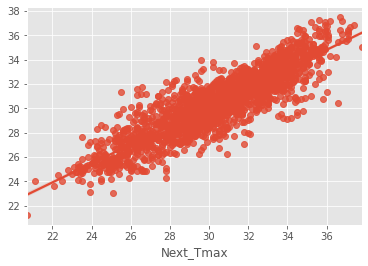

In [54]:
#Model with LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

r2score = r2_score(y_test,pred_lr)*100

#evaluation
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(lr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_lr)
plt.show()

### - DecisionTreeRegressor Model

MAE : 1.0030999465526456
RMSE : 1.4074703342697061
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 78.17731825686536 %
------------------------------

Cross validation score : 80.03522389381261

Accuracy Score - Cross Validation Score : -1.857905636947251


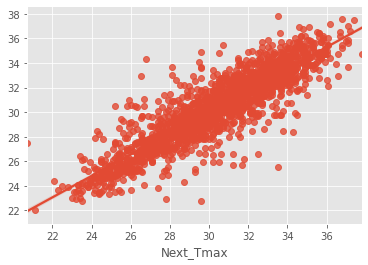

In [55]:
#Model with DecesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

r2score = r2_score(y_test,pred_dt)*100

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(dt, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_dt)
plt.show()

### - RandomForestRegressor Model

MAE : 0.6904906467129877
RMSE : 0.9219334359315837
------------------------------
Training r2 Score : 98.71833622439215 %
Testing r2 Score: 90.63670403664578 %
------------------------------

Cross validation score : 91.50494175963712

Accuracy Score - Cross Validation Score : -0.8682377229913385


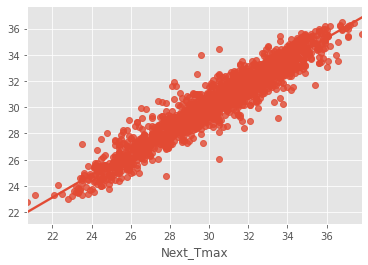

In [56]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

r2score = r2_score(y_test,pred_rf)*100

#evaluation
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(rf, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_rf)
plt.show()

### - KNeighborsRegressor Model

MAE : 0.9897167290219133
RMSE : 1.4345666245666961
------------------------------
Training r2 Score : 84.74079615177527 %
Testing r2 Score: 77.32897975639794 %
------------------------------

Cross validation score : 77.33741090068348

Accuracy Score - Cross Validation Score : -0.00843114428553804


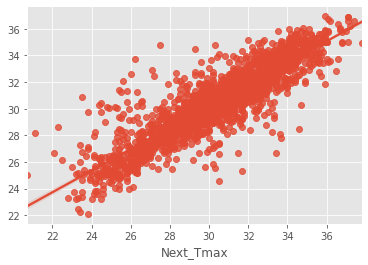

In [57]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
y_pred = knr.predict(x_train)
pred_knr = knr.predict(x_test)

r2score = r2_score(y_test,pred_knr)*100

#evaluation
mse = mean_squared_error(y_test,pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(knr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_knr)
plt.show()

### - XGBRegressor model

MAE : 0.6216551345914906
RMSE : 0.8082591955391385
------------------------------
Training r2 Score : 98.98789289881607 %
Testing r2 Score: 92.8033409512623 %
------------------------------

Cross validation score : 93.10662005911247

Accuracy Score - Cross Validation Score : -0.3032791078501731


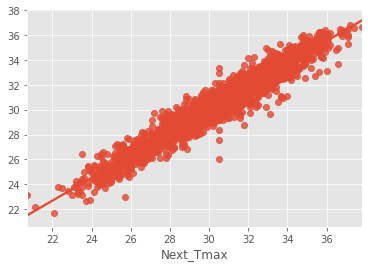

In [58]:
#lets check with XGBRegressor model
from xgboost import XGBRegressor
xgb = XGBRegressor(verbosity = 0)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_train)
pred_xgb = xgb.predict(x_test)

r2score = r2_score(y_test,pred_xgb)*100

#evaluation
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_xgb)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(xgb, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_xgb)
plt.show()

## ExtraTreesRegressor Model

MAE : 0.6310668091929448
RMSE : 0.8310995074205216
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 92.39085834496345 %
------------------------------

Cross validation score : 92.92598317546054

Accuracy Score - Cross Validation Score : -0.5351248304970966


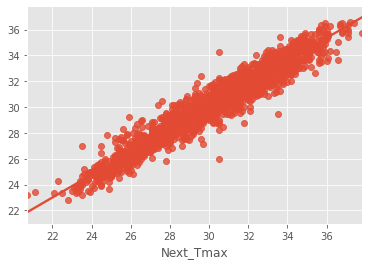

In [59]:
#lets check with Extra Trees regressor
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_pred = ext.predict(x_train)
pred_ext = ext.predict(x_test)

r2score = r2_score(y_test,pred_ext)*100

#evaluation
mse = mean_squared_error(y_test,pred_ext)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_ext)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(ext, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_ext)
plt.show()

##### Great we got least difference in accuracy and CV score in case of ExtraTreesRegressor algorithm, hence I am selecting it as our best suitable algorithm for final model.

## Hyperparameter Tuning

In [60]:
#lets selects different parameters for tuning
grid_params = {
                'max_depth': [8,9,10,12,15,20],
                'n_estimators':[500,700,1000,1200],
                'min_samples_split': [2,3]
                }

In [61]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(ExtraTreesRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [8, 9, 10, 12, 15, 20],
                         'min_samples_split': [2, 3],
                         'n_estimators': [500, 700, 1000, 1200]})

In [62]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 1000}

In [63]:
#lets check results of our final model with best parameters
model_1 = ExtraTreesRegressor(max_depth = 20, n_estimators = 500, min_samples_split = 2)
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_train)
pred = model_1.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print('MAE : ' ,mse )
print("RMSE :", rmse)

# r2 score
print("\nTraining r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"\nTesting r2 Score: {r2_score(y_test,pred)*100}%")

MAE : 0.6297892143759029
MAE :  0.6861963501224705
RMSE : 0.8283696941115546

Training r2 Score : 99.98040949996681 %

Testing r2 Score: 92.44076193191627%


Great we got improved r2 score after hyperparameter tuning for our best model

- __Lets see final Actual Vs Predicted sample.__

,Y Test,Pred
2552,32.4,32.497068
5992,26.6,26.899401
3304,28.9,29.583122
2840,29.3,29.585264
5336,28.1,28.697137


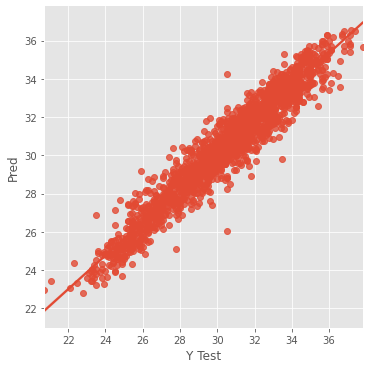

In [64]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## Model Saving

In [65]:
import joblib
joblib.dump(model_1,"Next_Tmax_prediction.pkl")

['Next_Tmax_prediction.pkl']

# 2. Prediction for Next_Tmin

In [66]:
# lets have a look at our updated data again
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,20.0,243.0,33.2,24.4,82.772179,98.766701,26.123852,21.898978,5.939675,70.856433,...,0.542941,0.887027,0.000000,0.041321,0.407898,146.5540,4.7296,5832.299316,31.1,22.4
1,24.0,18.0,29.2,26.7,61.024406,96.001274,28.647992,22.869397,10.055281,59.724718,...,0.332773,6.104770,0.000000,0.000000,0.000000,17.2956,0.2223,5693.029785,26.4,23.9
2,20.0,179.0,32.6,23.1,49.333893,88.554993,33.317147,24.631050,7.013684,92.062499,...,0.326501,0.000000,0.000000,0.040402,0.000000,146.5540,4.7296,5854.641602,35.3,25.2
3,18.0,281.0,29.2,24.4,66.647141,91.295555,30.251993,24.915042,5.515084,55.304806,...,0.629977,0.000000,0.000000,0.000000,0.000000,56.4448,1.2313,5804.297363,31.6,23.3
4,3.0,257.0,32.5,24.0,73.612526,90.554016,28.494540,24.381249,6.318541,25.409600,...,0.591366,0.000000,0.000000,0.178195,0.000000,33.3068,0.2661,5822.708984,28.3,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,9.0,166.0,28.2,24.6,62.787682,94.869614,26.882500,21.587750,5.408590,85.254661,...,0.074119,4.893331,0.448365,0.000000,0.000000,50.9312,0.4125,4846.185547,29.3,22.7
7479,4.0,41.0,32.6,27.6,55.653267,97.574753,31.312637,24.865950,6.577841,92.030476,...,0.012044,7.036035,0.000325,0.217794,0.000000,45.7160,2.5348,4893.187988,33.9,26.2
7480,23.0,276.0,30.1,26.5,74.596848,90.657898,27.415433,24.756656,5.987920,55.784648,...,0.718600,0.029967,0.672873,0.000000,0.000000,15.5876,0.1554,5498.562500,27.7,23.9
7481,2.0,21.0,29.8,22.7,63.931870,83.752220,30.563332,25.571009,9.704233,43.382055,...,0.351719,0.000000,0.000000,0.000000,0.000000,44.7624,0.5141,5666.851563,30.8,23.1


## seperate label and features 

In [67]:
df_x = df.drop(columns = 'Next_Tmin', axis = 1)
df_y = df['Next_Tmin']

In [68]:
#check for skewness
df_x.skew()

station             0.004649
Date                0.011548
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            1.028177
LDAPS_LH            0.599506
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.644503
LDAPS_CC4           0.680612
LDAPS_PPT1          5.277403
LDAPS_PPT2          5.729713
LDAPS_PPT3          6.705847
LDAPS_PPT4          6.819695
DEM                 1.775148
Slope               1.600877
Solar radiation    -0.501098
Next_Tmax          -0.268366
dtype: float64

In [69]:
#Lets treat the skewness
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]= np.cbrt(df_x[index])
        if df_x.skew().loc[index]<-0.5:
            df_x[index]=np.square(df_x[index])

In [70]:
#lets check skewness again
df_x.skew()

station             0.004649
Date                0.011548
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            0.576039
LDAPS_LH           -0.312649
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.191622
LDAPS_CC4          -0.454967
LDAPS_PPT1          1.989819
LDAPS_PPT2          2.317437
LDAPS_PPT3          2.637855
LDAPS_PPT4          2.956772
DEM                 0.943008
Slope               0.626847
Solar radiation    -0.501098
Next_Tmax          -0.268366
dtype: float64

In [71]:
#lets check our features
df_x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax
0,20.0,243.0,33.2,24.4,82.772179,98.766701,26.123852,21.898978,1.811010,4.138025,...,0.818344,0.815801,0.960828,0.000000,0.345720,0.741624,5.272289,1.678578,5832.299316,31.1
1,24.0,18.0,29.2,26.7,61.024406,96.001274,28.647992,22.869397,2.158397,3.908871,...,0.175191,0.692973,1.827636,0.000000,0.000000,0.000000,2.586099,0.605778,5693.029785,26.4
2,20.0,179.0,32.6,23.1,49.333893,88.554993,33.317147,24.631050,1.914177,4.515379,...,0.536739,0.688591,0.000000,0.000000,0.343136,0.000000,5.272289,1.678578,5854.641602,35.3
3,18.0,281.0,29.2,24.4,66.647141,91.295555,30.251993,24.915042,1.766786,3.809965,...,0.611781,0.857251,0.000000,0.000000,0.000000,0.000000,3.835965,1.071819,5804.297363,31.6
4,3.0,257.0,32.5,24.0,73.612526,90.554016,28.494540,24.381249,1.848725,2.939900,...,0.904095,0.839367,0.000000,0.000000,0.562728,0.000000,3.217444,0.643203,5822.708984,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,9.0,166.0,28.2,24.6,62.787682,94.869614,26.882500,21.587750,1.755340,4.401216,...,0.415405,0.420059,1.697728,0.765380,0.000000,0.000000,3.706761,0.744403,4846.185547,29.3
7479,4.0,41.0,32.6,27.6,55.653267,97.574753,31.312637,24.865950,1.873676,4.514856,...,0.070743,0.229219,1.916208,0.068744,0.601656,0.000000,3.575659,1.363477,4893.187988,33.9
7480,23.0,276.0,30.1,26.5,74.596848,90.657898,27.415433,24.756656,1.815900,3.820952,...,0.833421,0.895700,0.310610,0.876283,0.000000,0.000000,2.498004,0.537630,5498.562500,27.7
7481,2.0,21.0,29.8,22.7,63.931870,83.752220,30.563332,25.571009,2.132981,3.513743,...,0.319059,0.705882,0.000000,0.000000,0.000000,0.000000,3.550622,0.801092,5666.851563,30.8


## Apply StandardScaler

In [72]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
df_X = scaler.fit_transform(df_x)
df_X = pd.DataFrame(df_X,columns = df_x.columns)

In [73]:
#lets have a look on updated features
df_X

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax
0,0.970136,1.011672,1.171617,0.468821,1.811952,1.490689,-1.282208,-0.783162,-0.503859,0.432079,...,1.574899,0.964116,1.241553,-0.501915,0.395862,1.470594,1.652404,2.065106,1.153266,0.230625
1,1.525666,-1.514519,-0.213633,1.465232,0.299222,1.088523,-0.385340,-0.342541,1.617216,0.121728,...,-1.007529,0.436494,2.858551,-0.501915,-0.478786,-0.419023,-1.136732,-0.964322,0.822832,-1.329053
2,0.970136,0.293111,0.963829,-0.094368,-0.513947,0.005638,1.273688,0.457341,0.126055,0.943145,...,0.444181,0.417674,-0.550835,-0.501915,0.389325,-0.419023,1.652404,2.065106,1.206275,1.624380
3,0.692371,1.438318,-0.213633,0.468821,0.690327,0.404188,0.184588,0.586288,-0.773880,-0.012225,...,0.745494,1.142170,-0.550835,-0.501915,-0.478786,-0.419023,0.161034,0.351708,1.086827,0.396548
4,-1.390867,1.168858,0.929198,0.295532,1.174825,0.296348,-0.439864,0.343918,-0.273581,-1.190587,...,1.919214,1.065347,-0.550835,-0.501915,0.944878,-0.419023,-0.481192,-0.858637,1.130511,-0.698545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,-0.557572,0.147154,-0.559945,0.555466,0.421871,0.923950,-1.012648,-0.924476,-0.843768,0.788530,...,-0.043007,-0.735837,2.616212,1.049475,-0.478786,-0.419023,0.026878,-0.572865,-1.186409,-0.366698
7479,-1.251984,-1.256286,0.963829,1.855132,-0.074384,1.317348,0.561452,0.563998,-0.121235,0.942436,...,-1.426919,-1.555607,3.023778,-0.362573,1.043365,-0.419023,-0.109249,1.175309,-1.074890,1.159795
7480,1.386783,1.382180,0.098049,1.378588,1.243293,0.311456,-0.823288,0.514373,-0.474001,0.002655,...,1.635436,1.307329,0.028596,1.274271,-0.478786,-0.419023,-1.228204,-1.156760,0.361435,-0.897653
7481,-1.529749,-1.480836,-0.005845,-0.267656,0.501459,-0.692812,0.295212,0.884131,1.462032,-0.413409,...,-0.429863,0.491946,-0.550835,-0.501915,-0.478786,-0.419023,-0.135245,-0.412783,0.760721,0.131071


## Finding Best Randomstate

In [74]:
#to find random stat which gives maximum r2_score
max_r_score=0
r_state = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(df_X, df_y,test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.8468046934844755 on Random State 1


In [75]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y,test_size = 0.25,random_state = 2)

## Model Building

### -  LinearRegression Model

MAE : 0.755738431123361
RMSE : 0.9573761783415323
------------------------------
Training r2 Score : 83.52774538004431 %
Testing r2 Score: 83.87970375409817 %
------------------------------

Cross validation score : 76.88127372984188

Accuracy Score - Cross Validation Score : 6.998430024256294


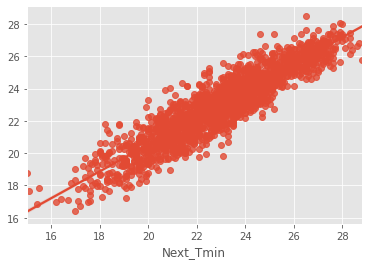

In [76]:
#Model with LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

r2score = r2_score(y_test,pred_lr)*100

#evaluation
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(lr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_lr)
plt.show()

### - DecesionTreeRegressor Model

MAE : 0.8136290753607698
RMSE : 1.0942026913069083
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 78.94266812980364 %
------------------------------

Cross validation score : 79.49135984400819

Accuracy Score - Cross Validation Score : -0.5486917142045513


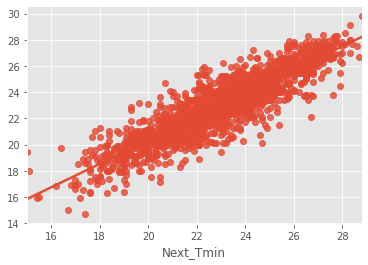

In [77]:
#Model with DecesionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

r2score = r2_score(y_test,pred_dt)*100

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(dt, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_dt)
plt.show()

### - RandomForestRegressor Model

MAE : 0.5705788348476751
RMSE : 0.7516605316122021
------------------------------
Training r2 Score : 98.61686554241086 %
Testing r2 Score: 90.06309179031493 %
------------------------------

Cross validation score : 91.44899946922051

Accuracy Score - Cross Validation Score : -1.385907678905582


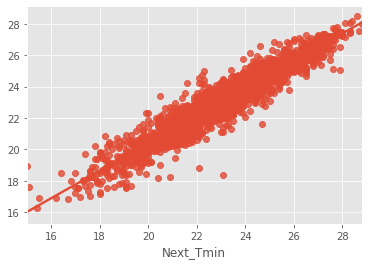

In [78]:
#Model with RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

r2score = r2_score(y_test,pred_rf)*100

#evaluation
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(rf, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_rf)
plt.show()

### - KNeighborsRegressor Model

MAE : 0.6249706039551043
RMSE : 0.8269276267241638
------------------------------
Training r2 Score : 91.77184860684703 %
Testing r2 Score: 87.97340219564276 %
------------------------------

Cross validation score : 77.33741090068348

Accuracy Score - Cross Validation Score : 10.635991294959283


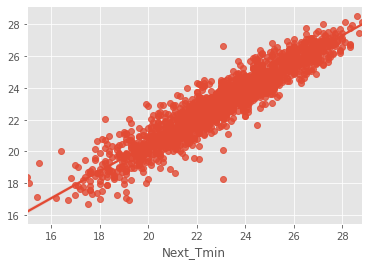

In [79]:
#Model with KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
y_pred = knr.predict(x_train)
pred_knr = knr.predict(x_test)

r2score = r2_score(y_test,pred_knr)*100

#evaluation
mse = mean_squared_error(y_test,pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(knr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_knr)
plt.show()

### - XGBRegressor model

MAE : 0.47183910208803526
RMSE : 0.6218944895181624
------------------------------
Training r2 Score : 99.22649438096501 %
Testing r2 Score: 93.19792835758666 %
------------------------------

Cross validation score : 93.10662005911247

Accuracy Score - Cross Validation Score : 0.09130829847418909


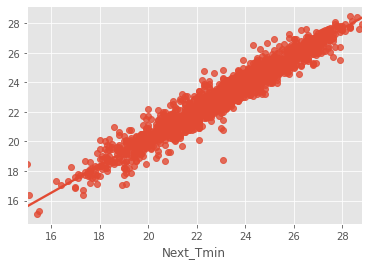

In [80]:
#lets check with XGBRegressor model
xgb = XGBRegressor(verbosity = 0)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_train)
pred_xgb = xgb.predict(x_test)

r2score = r2_score(y_test,pred_xgb)*100

#evaluation
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_xgb)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(xgb, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_xgb)
plt.show()

## ExtraTreesRegressor Model

MAE : 0.5386926777124533
RMSE : 0.7131711065783237
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 91.05469270698033 %
------------------------------

Cross validation score : 92.9406841952493

Accuracy Score - Cross Validation Score : -1.8859914882689708


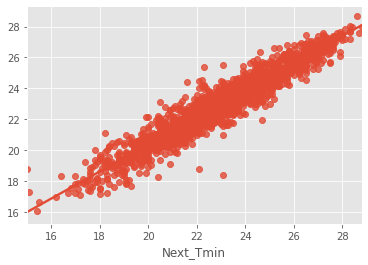

In [81]:
ext = ExtraTreesRegressor( )
ext.fit(x_train,y_train)
y_pred = ext.predict(x_train)
pred_ext = ext.predict(x_test)

r2score = r2_score(y_test,pred_ext)*100

#evaluation
mse = mean_squared_error(y_test,pred_ext)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_ext)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(ext, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_ext)
plt.show()

##### Great we can see that XGBRegressor is giving least difference in r2score and CV score hence I am selecting it as best suitable algorithm for final model.

## Hyperparameter Tuning

In [84]:
#lets selects different parameters for tuning
grid_params = { 
                'n_estimators':[800,900,1000,1200],
                'eta': [0.1,0.2,0.3],
                'eval_metric':['rmse','mae','error'],
                'objective': ['reg:squarederror','reg:linear']
                }

In [ ]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(XGBRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

In [ ]:
#lets check results of our final model with best parameters
model_2 = XGBRegressor(eta = 0.1, n_estimators = 1200, eval_metric = 'rmse', objective = 'reg:squarederror')
model_2.fit(x_train,y_train)
y_pred = model_2.predict(x_train)
pred = model_2.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print('MAE : ' ,mse )
print("RMSE :", rmse)

# r2 score
print("\nTraining r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"\nTesting r2 Score: {r2_score(y_test,pred)*100}%")


###### Great we got improved r2 score after hyper parameter tuning, that is from 93.24% to 94.41%

- __Lets see final Actual Vs Predicted sample.__

In [ ]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## Model Saving

In [ ]:
joblib.dump(model_2,"Next_Tmin.pkl")

Finally I have saved two different models separately in .pkl files

## Conclusion

final model r2 score for predicting Next_Tmax = 92.71%

final model r2 score for predicting Next_Tmax = 94.41%